In [1]:
#this is to import dataframe from other notebooks
#before importing we need to have converted .ipynb to .py files using the command - 
#!jupyter nbconvert --to script Buildings_Exploratory.ipynb  
#at the end of each .ipynb file

import Agent_Data_First_Look as agents
import Buildings_Exploratory as build

0.20.2
1.13.0
3.12
success


[NbConvertApp] Converting notebook Agent_Data_First_Look.ipynb to script
[NbConvertApp] Writing 3544 bytes to Agent_Data_First_Look.py


dict_keys(['building1'])
Counter({'box': 5024, 'polygon': 855}) Counter({'grey': 5024, 'off_white': 843, 'black': 12})
dict_keys(['geometries', 'type'])
obstacle
<class 'list'>
<class 'dict'>
6461
3
[{'collision_geometry': {'dims': [4.150000000000006, 0.15, 2.99], 'type': 'box', 'material': 'grey'}, 'name': 'NoName10', 'config': {'position': [114.325, -45.14, 7.5], 'orientation': [6.123233995736766e-17, 1.0, 0.0, 0.0]}}, {'collision_geometry': {'dims': [3.6099999999999994, 0.15, 2.99], 'type': 'box', 'material': 'grey'}, 'name': 'NoName12', 'config': {'position': [116.4, -46.945, 7.5], 'orientation': [0.7071067811865476, 0.7071067811865475, 0.0, 0.0]}}, {'collision_geometry': {'dims': [47.69000000000001, 0.15, 2.99], 'type': 'box', 'material': 'grey'}, 'name': 'NoName19', 'config': {'position': [92.445, -62.4, 7.5], 'orientation': [1.0, 0.0, 0.0, 0.0]}}, {'collision_geometry': {'dims': [8.450000000000003, 0.15, 2.99], 'type': 'box', 'material': 'grey'}, 'name': 'NoName26', 'config': {'

[NbConvertApp] Converting notebook Buildings_Exploratory.ipynb to script
[NbConvertApp] Writing 8977 bytes to Buildings_Exploratory.py


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
exits = build.exits
agents = agents.df

In [16]:
agents = agents[agents.Z >= 0]
agents.shape

(3830209, 12)

In [17]:
exits.head()
exits.shape

(100, 7)

In [18]:
#this process is to find out the centroids of each entrance/exit
exits['mean_x'] = exits['x'].apply(np.mean)
exits['mean_y'] = exits['y'].apply(np.mean)
exits['mean_z'] = exits['z'].apply(np.mean)
exits['mean_x'] = exits['mean_x'].apply(lambda x: round(x,2))
exits['mean_y'] = exits['mean_y'].apply(lambda x: round(x,2))
exits['mean_z'] = exits['mean_z'].apply(lambda x: round(x,2))
exits['centroid'] = exits[['mean_x','mean_y','mean_z']].apply(tuple,axis=1)
exits = exits.drop(['mean_x','mean_y','mean_z'],axis=1)
exits

,name,no_of_triangles,triangles,x,y,z,centroid
0,entry__exit_4_58,6,"[(100.6, -17.01, 6.0), (100.6, -11.75, 6.0), (...","[100.6, 100.6, 92.88, 100.6, 92.88, 92.88]","[-17.01, -11.75, -11.75, -17.01, -11.75, -17.01]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(96.74, -14.38, 6.0)"
2,entry_exit_7_455,6,"[(120.12, 60.33, 6.0), (122.93, 64.5, 6.0), (1...","[120.12, 122.93, 120.16, 120.12, 123.0, 122.93]","[60.33, 64.5, 64.5, 60.33, 60.28, 64.5]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(121.54, 62.41, 6.0)"
4,entry_exit_stairs_544,6,"[(46.24, 9.3, 6.0), (53.04, 9.3, 6.0), (53.04,...","[46.24, 53.04, 53.04, 46.24, 53.04, 46.08]","[9.3, 9.3, 17.1, 9.3, 17.1, 16.96]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(49.61, 13.18, 6.0)"
6,entry_exit_591,9,"[(107.77, 10.18, 6.0), (107.42, 16.32, 6.0), (...","[107.77, 107.42, 103.53, 103.54, 107.77, 107.7...","[10.18, 16.32, 16.7, 9.3, 8.9, 10.18, 9.3, 10....","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(105.85, 11.97, 6.0)"
8,exit_entry_1_1002,6,"[(32.3, -20.64, 6.0), (36.34, -11.79, 6.0), (3...","[32.3, 36.34, 32.3, 32.3, 36.36, 36.34]","[-20.64, -11.79, -11.75, -20.64, -20.75, -11.79]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(34.32, -16.23, 6.0)"
10,exit_entry_ramp_1004,6,"[(32.3, -20.64, 6.0), (30.31, -11.75, 6.0), (3...","[32.3, 30.31, 30.39, 32.3, 32.3, 30.31]","[-20.64, -11.75, -20.67, -20.64, -11.75, -11.75]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(31.32, -16.2, 6.0)"
12,escalator_and_entry_exit_1442,27,"[(89.34, -17.41, 6.0), (89.54, -11.75, 6.0), (...","[89.34, 89.54, 84.15, 89.34, 84.15, 84.15, 84....","[-17.41, -11.75, -14.7, -17.41, -14.7, -17.43,...","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...","(87.27, -15.75, 6.0)"
14,NJT-223_4735,9,"[(-99.34, -23.12, 15.0), (-96.01, -23.12, 15.0...","[-99.34, -96.01, -96.01, -96.01, -96.01, -99.6...","[-23.12, -23.12, -21.47, -21.47, -20.1, -21.74...","[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15....","(-97.55, -21.93, 15.0)"
15,NJT-222_4752,9,"[(-101.13, -28.64, 15.0), (-101.15, -27.2, 15....","[-101.13, -101.15, -105.31, -104.93, -101.13, ...","[-28.64, -27.2, -29.03, -30.03, -28.64, -29.03...","[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15....","(-102.91, -29.03, 15.0)"
16,Greyhound_Bag_Check_7121,12,"[(82.2, 38.5, 0.0), (82.2, 36.5, 0.0), (83.0, ...","[82.2, 82.2, 83.0, 82.2, 82.2, 83.0, 82.2, 83....","[38.5, 36.5, 35.0, 36.5, 35.0, 35.0, 38.5, 40....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(82.53, 37.38, 0.0)"


In [41]:
#for ranvir - entrance/exit mapping
'''exits_sorted = exits[['name','centroid']]
exits_sorted['level'] = exits_sorted['centroid'].apply(lambda x: x[2])
exits_sorted = exits_sorted.sort_values(['level','name'])
exits_sorted = exits_sorted.reset_index()
exits_sorted = exits_sorted.reset_index()
exits_sorted = exits_sorted.drop('index',axis=1)
exits_sorted.rename(columns={'level_0': 'index'}, inplace=True)
exits_sorted.head()'''

C:\Users\naren\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,index,name,centroid,level
0,0,Greyhound_-_60_8951,"(33.62, 22.88, 0.0)",0.0
1,1,Greyhound_-_61_8953,"(34.74, 34.74, 0.0)",0.0
2,2,Greyhound_-_62_8955,"(34.51, 44.59, 0.0)",0.0
3,3,Greyhound_-_64_13744,"(44.91, 51.15, 0.0)",0.0
4,4,Greyhound_-_65_10170,"(51.34, 49.58, 0.0)",0.0


In [42]:
# Convert to CSV for usage in other files
#exits.to_csv('entrance_exit_points.csv',index=False)
exits_sorted.to_csv('exits_to_map.csv',index=False)

## ENTRANCE through each agent entered

In [44]:
#Question-1 : Through which entrance did each of the agents enter and when??
#Approach - take the minimum time for each agent and the corresponding X,Y,Z coordinate
#Take the euclidean distance of each agent's starting point with each triangle in the each entrance
#there are about 800 triangles in total - so pretty inefficient - but more accurate - we can cross check with mean method later
#take the closest entrance

#taking only the minimum time, that is the time each agent entered the building
df = agents.sort_values("sec").groupby("agent_id", as_index=False).first() #1063 rows in df 
from scipy.spatial import distance
df_list = []
#calculating euclidean distance
for i in df.iterrows(): #each agent going into the loop
    starting_point = (i[1]['X'],i[1]['Y'],round(i[1]['Z']-1,0)) #there is a -1 on Z value to make it in unison with building Z values
    dist = 200
    for j in exits.iterrows(): #each exit going into the loop
        for k in j[1][2]: #each triangle going into the loop
            if k[2] == starting_point[2]: #check if floors are equal - makes it faster and more accurate
                d = distance.euclidean(k,starting_point) #distance from each triangle to starting point of agent
                if d < dist:
                    dist = d
                    entrance = j[1]['name']
                    triangle = k
                
    data = {'agent_id' : i[1]['agent_id'],
            'entry_time' : i[1]['sec'],
            'agent_type' : i[1]['agent_type'],
            'has_luggage' :  i[1]['has_luggage'],
            'is_disabled' : i[1]['is_disabled'],
            'starting_point' : starting_point,
            'entrance' : entrance,
            'ent_dist' : dist,
            'triangle' : triangle}
    df_list.append(data)
    entrance = None
    traingle = None

entrance_list = pd.DataFrame(df_list)
entrance_list.head()

,agent_id,agent_type,ent_dist,entrance,entry_time,has_luggage,is_disabled,starting_point,triangle
0,0.0,4.0,4.629891,entry_exit_591,70201.0,0.0,0.0,"(105.955, 20.712, 6.0)","(107.42, 16.32, 6.0)"
1,1.0,4.0,26.831601,Lower_9th_Entrance_14674,70201.0,0.0,0.0,"(-97.598, -42.34, 0.0)","(-124.4, -41.08, 0.0)"
2,2.0,4.0,5.696769,Greyhound_-_74_8983,70201.0,0.0,0.0,"(102.213, 37.032, 0.0)","(107.79, 35.87, 0.0)"
3,3.0,4.0,0.612361,NorthExit_14267,70201.0,0.0,1.0,"(116.035, 32.631, 6.0)","(115.6, 32.2, 6.0)"
4,4.0,4.0,103.212539,NJT-221_9054,70201.0,0.0,0.0,"(69.833, -59.586, 15.0)","(-26.67, -22.98, 15.0)"


In [45]:
counts = entrance_list.groupby('entrance').size().nlargest(10)
counts
#distribution of entrances among agents

entrance
Subway_Entrance_2_12714                  1277
Subway_Entrance_1_10458                  1213
SouthEntrance1_13925                     1068
NorthExit_14267                           906
NJ_Transit_Office_11746                   875
SouthEntrance2_13909                      703
42nd_Street_Entrance_14495                323
Lower_9th_Entrance_14674                  213
Subway_Entrance_10424                     158
41st_Street_Entrance_South_East_10539     155
dtype: int64

In [46]:
entrance_list[entrance_list.ent_dist < 200].shape

(8466, 9)

In [47]:
agent_entry = entrance_list[entrance_list.ent_dist < 200]
agent_entry.ent_dist.describe()
#distribution of distance

count    8466.000000
mean       15.665033
std        27.814193
min         0.294146
25%         2.983895
50%         4.337442
75%        12.100748
max       181.369787
Name: ent_dist, dtype: float64

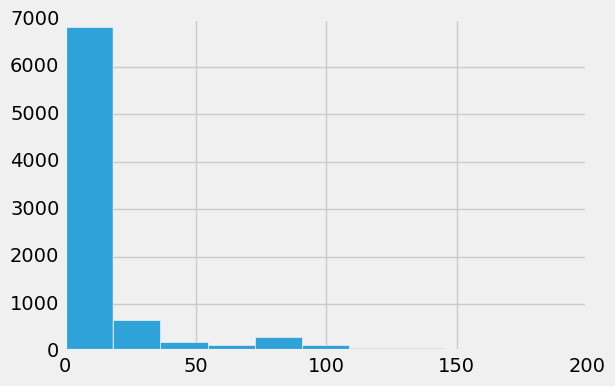

In [48]:
#histogram of distances of agents
agent_entry.ent_dist.hist()

## EXITS through each agent left

In [49]:
#Lets do the same for exits now. 
#Approach - very similar to the entrance - instead of taking the min(time), take the max(time) and calculate distance.
#taking only the maximum time, that is the time each agent exited the building
df = agents.sort_values("sec").groupby("agent_id", as_index=False).last() #1063 rows in df 
from scipy.spatial import distance
df_list = []
#calculating euclidean distance
for i in df.iterrows(): #each agent going into the loop
    last_point = (i[1]['X'],i[1]['Y'],round(i[1]['Z']-1,0))
    dist = 200
    for j in exits.iterrows(): #each exit going into the loop
        for k in j[1][2]: #each triangle going into the loop
            if k[2] == last_point[2]: #check if agent is in the same floor as an exit
                d = distance.euclidean(k,last_point) #distance from each triangle to last point of agent
                if d < dist: #if the distance is less than the previously recorded distance
                    dist = d
                    exit = j[1]['name']
                    triangle = k
                
    data = {'agent_id' : i[1]['agent_id'],
            'exit_time' : i[1]['sec'],
            'agent_type' : i[1]['agent_type'],
            'has_luggage' :  i[1]['has_luggage'],
            'is_disabled' : i[1]['is_disabled'],
            'last_point' : last_point,
            'exit' : exit,
            'exit_dist' : dist,
            'triangle' : triangle}
    df_list.append(data)
    exit = None
    triangle = None

exit_list = pd.DataFrame(df_list)
exit_list.head()

,agent_id,agent_type,exit,exit_dist,exit_time,has_luggage,is_disabled,last_point,triangle
0,0.0,4.0,exit_entry_ramp_1004,19.017465,71399.0,0.0,0.0,"(19.272, -36.099, 6.0)","(30.39, -20.67, 6.0)"
1,1.0,4.0,41st_Street_Entrance_North_West_10510,65.100115,71243.0,0.0,0.0,"(-29.258, -61.633, 6.0)","(13.45, -12.5, 6.0)"
2,2.0,4.0,Subway_Entrance_1_10458,15.683763,71399.0,0.0,0.0,"(100.772, -41.197, 3.0)","(116.44, -41.9, 3.0)"
3,3.0,4.0,Greyhound_Offices_12722,76.098666,71399.0,0.0,1.0,"(6.285, -39.113, 3.0)","(22.26, 35.29, 3.0)"
4,4.0,4.0,NJT-221_9054,79.338735,71399.0,0.0,0.0,"(43.441, -60.116, 15.0)","(-26.67, -22.98, 15.0)"


In [50]:
counts = exit_list.groupby('exit').size().nlargest(10)
counts
#distribution of entrances among agents

exit
NJ_Transit_Office_11746                         1046
Subway_Entrance_2_12714                          786
Subway_Entrance_1_10458                          740
41st_Street_Entrance_North_West_10510            695
NJT-221_9054                                     349
exit_entry_ramp_1004                             333
NorthExit_14267                                  312
escalator_and_entry_exit_1442                    312
SouthEntrance1_13925                             229
Greyhound_Trailways_-_canada_bound_-_24_8685     191
dtype: int64

In [53]:
exit_list[exit_list.exit_dist < 200].shape

(7833, 9)

In [55]:
agent_exit = exit_list[exit_list.exit_dist < 200]
agent_exit.exit_dist.describe()
#distribution of distance

count    8379.000000
mean       27.456226
std        36.670201
min         0.053712
25%         2.334316
50%         8.125830
75%        41.040373
max       185.850403
Name: exit_dist, dtype: float64

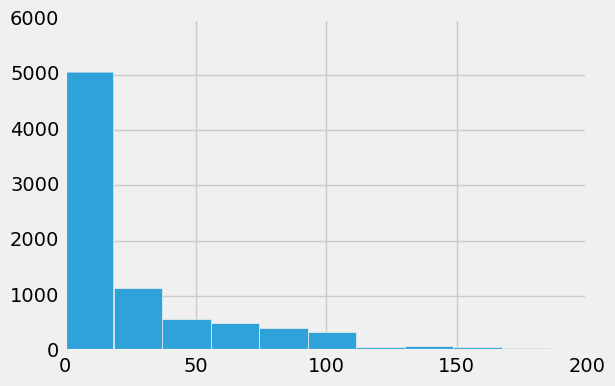

In [39]:
agent_exit.exit_dist.hist()

## Average Tracks

In [57]:
agent_loc = pd.merge(agent_entry,agent_exit, on = 'agent_id')
agent_loc = agent_loc[['agent_id','ent_dist','entrance','entry_time','starting_point','exit','exit_dist','exit_time','last_point']]
agent_loc['total_time'] = agent_loc['exit_time']-agent_loc['entry_time']
print(agent_loc.shape)
agent_loc.head(100)

(8350, 10)


,agent_id,ent_dist,entrance,entry_time,starting_point,exit,exit_dist,exit_time,last_point,total_time
0,0.0,4.629891,entry_exit_591,70201.0,"(105.955, 20.712, 6.0)",exit_entry_ramp_1004,19.017465,71399.0,"(19.272, -36.099, 6.0)",1198.0
1,1.0,26.831601,Lower_9th_Entrance_14674,70201.0,"(-97.598, -42.34, 0.0)",41st_Street_Entrance_North_West_10510,65.100115,71243.0,"(-29.258, -61.633, 6.0)",1042.0
2,2.0,5.696769,Greyhound_-_74_8983,70201.0,"(102.213, 37.032, 0.0)",Subway_Entrance_1_10458,15.683763,71399.0,"(100.772, -41.197, 3.0)",1198.0
3,3.0,0.612361,NorthExit_14267,70201.0,"(116.035, 32.631, 6.0)",Greyhound_Offices_12722,76.098666,71399.0,"(6.285, -39.113, 3.0)",1198.0
4,4.0,103.212539,NJT-221_9054,70201.0,"(69.833, -59.586, 15.0)",NJT-221_9054,79.338735,71399.0,"(43.441, -60.116, 15.0)",1198.0
5,5.0,1.471427,Subway_Entrance_1_10458,70201.0,"(120.203, -47.517, 3.0)",NJ_Transit_Office_11746,154.555883,71399.0,"(-53.913, -59.712, 9.0)",1198.0
6,6.0,2.157145,NorthExit_14267,70201.0,"(125.207, 33.875, 6.0)",NJ_Transit_Office_11746,144.958239,71399.0,"(-42.837, -42.023, 9.0)",1198.0
7,7.0,6.089258,NJT-202_8897,70201.0,"(36.526, -49.733, 12.0)",NJ_Transit_Office_11746,93.192203,71383.0,"(17.55, -20.641, 9.0)",1182.0
8,8.0,1.865408,Greyhound_-_79_8999,70201.0,"(82.995, 14.989, 0.0)",Greyhound_Trailways_-_canada_bound_-_22_8687,41.114955,71399.0,"(-18.518, -40.682, 0.0)",1198.0
9,9.0,4.808825,Greyhound_-_83_9010,70201.0,"(49.708, 18.034, 0.0)",exit_entry_ramp_1004,36.115040,71056.0,"(22.515, -55.916, 6.0)",855.0


In [98]:
df = agent_loc
df.groupby(['entrance','exit']).size().nlargest(10)

entrance                 exit                                 
Subway_Entrance_2_12714  Subway_Entrance_2_12714                  216
Subway_Entrance_1_10458  Subway_Entrance_1_10458                  198
Subway_Entrance_2_12714  NJ_Transit_Office_11746                  160
Subway_Entrance_1_10458  Subway_Entrance_2_12714                  138
                         NJ_Transit_Office_11746                  131
SouthEntrance1_13925     NJ_Transit_Office_11746                  126
NJ_Transit_Office_11746  NJ_Transit_Office_11746                  115
Subway_Entrance_2_12714  Subway_Entrance_1_10458                  115
Subway_Entrance_1_10458  41st_Street_Entrance_North_West_10510    105
NJ_Transit_Office_11746  41st_Street_Entrance_North_West_10510    102
dtype: int64

In [59]:
agent_list = agent_loc[(agent_loc.entrance == 'Subway_Entrance_2_12714') & (agent_loc.exit == 'Subway_Entrance_2_12714')].agent_id
subset = agents[agents['agent_id'].isin(agent_list)]
subset.loc[:,'Z'] -= 1
subset

C:\Users\naren\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,sec,agent_id,agent_type,has_luggage,is_disabled,X,Y,Z,velocity,queue_id,lookUp_X,lookUp_Y
87,70201,696,2,0.0,0.0,109.398,35.950,3.000,1.011,-1.0,106.680,37.590
90,70201,720,2,0.0,0.0,109.231,34.965,3.000,1.061,-1.0,103.980,32.855
99,70201,792,0,0.0,0.0,104.007,34.264,3.000,2.459,-1.0,102.620,41.355
105,70201,840,0,0.0,0.0,108.927,36.121,3.000,2.982,-1.0,102.620,41.355
106,70201,848,0,0.0,0.0,115.939,36.371,3.000,1.733,-1.0,112.575,36.935
109,70201,872,0,0.0,0.0,104.088,22.938,3.000,3.562,-1.0,103.925,19.725
110,70201,880,0,0.0,0.0,108.478,34.692,3.000,1.862,-1.0,103.980,32.855
112,70201,896,0,0.0,0.0,104.730,31.214,3.000,1.593,-1.0,103.980,32.855
115,70201,920,0,0.0,0.0,111.576,36.989,3.000,3.953,-1.0,106.680,37.590
122,70201,976,0,0.0,0.0,123.974,46.630,3.000,3.397,-1.0,120.650,41.350


In [132]:
id = 696
df = subset[subset.agent_id==id].sort_values('sec')
total_time = agent_loc[agent_loc.agent_id == id]['total_time'].values[0]
entry_time = agent_loc[agent_loc.agent_id == id]['entry_time'].values[0]
exit_time = agent_loc[agent_loc.agent_id == id]['exit_time'].values[0]
df['norm_time'] = round((df['sec'] - entry_time)/total_time,3)
agent_life = df
#for individual path
agent_type = agent_life.agent_type.unique()[0]
xyz_list = []
for i in range(np.int64(entry_time),np.int64(exit_time+1)):
    df = agent_life[agent_life.sec == i]
    if df.empty:
        xyz_list.append((0,0,0))
    else:
        x=df.X.values[0]
        y=df.Y.values[0]
        z=df.Z.values[0]
        xyz_list.append((x,y,z))

In [135]:
agent_life.head()

,sec,agent_id,agent_type,has_luggage,is_disabled,X,Y,Z,velocity,queue_id,lookUp_X,lookUp_Y,norm_time
87,70201,696,2,0.0,0.0,109.398,35.950,3.0,1.011,-1.0,106.68,37.590,0.000
549,70202,696,2,0.0,0.0,107.967,36.612,3.0,2.021,-1.0,102.62,41.355,0.001
1015,70203,696,2,0.0,0.0,106.307,37.750,3.0,2.021,-1.0,102.00,41.355,0.002
1484,70204,696,2,0.0,0.0,104.554,38.746,3.0,2.021,-1.0,102.00,41.355,0.003
1956,70205,696,2,0.0,0.0,103.065,40.109,3.0,2.021,-1.0,102.00,41.355,0.003


In [106]:
!jupyter nbconvert --to script Track_Agents.ipynb

[NbConvertApp] Converting notebook Track_Agents.ipynb to script
[NbConvertApp] Writing 2544 bytes to Track_Agents.py
